In [1]:
%matplotlib inline
path = "data/redux/"
# path = "data/redux/sample/"
from utils import *

Using TensorFlow backend.


In [2]:
batch_size = 8

In [3]:
# %cd data/redux

In [4]:
# %cd train

In [5]:
# %mkdir ../valid

In [6]:
# g = glob('*.jpg')
# shuf = np.random.permutation(g)
# for i in range(2000): os.rename(shuf[i], '../valid/' + shuf[i])

In [7]:
# %ls data/redux/valid | wc -l

In [8]:
# %mkdir ../sample
# %mkdir ../sample/train
# %mkdir ../sample/valid

In [9]:
# 复制 而不是 之前的移动 注意
from shutil import copyfile

In [10]:
# g = glob('*.jpg')
# shuf = np.random.permutation(g)
# for i in range(200): copyfile(shuf[i], '../sample/train/' + shuf[i])

In [11]:
# %ls sample/train | wc -l

In [12]:
# g = glob('*.jpg')
# shuf = np.random.permutation(g)
# for i in range(50): copyfile(shuf[i], '../sample/valid/' + shuf[i])

In [13]:
# %ls ../sample/valid | wc -l

In [14]:
# %mkdir cats
# %mkdir dogs
# %mkdir ../valid/cats
# %mkdir ../valid/dogs
# %mkdir ../sample/valid/cats
# %mkdir ../sample/valid/dogs
# %mkdir ../sample/train/cats
# %mkdir ../sample/train/dogs

In [15]:
# %mv cat.*.jpg cats/
# %mv dog.*.jpg dogs/

In [16]:
# %cd ../valid/
# %mv cat.*.jpg cats/
# %mv dog.*.jpg dogs/

In [17]:
# %cd ../sample/valid/
# %mv cat.*.jpg cats/
# %mv dog.*.jpg dogs/

In [18]:
# %cd ../train/
# %mv cat.*.jpg cats/
# %mv dog.*.jpg dogs/

In [19]:
from vgg16 import Vgg16

In [20]:
vgg = Vgg16()

In [21]:
batches = vgg.get_batches(path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [22]:
vgg.finetune(batches)

In [23]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 1108s - loss: 3.4324 - acc: 0.7842 - val_loss: 2.7022 - val_acc: 0.8305


In [25]:
# %mkdir data/redux/results

In [26]:
vgg.model.save_weights(path + 'results/ft1.h5')
# vgg.model.load_weights(path + 'results/ft1.h5')

In [27]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 1114s - loss: 2.2125 - acc: 0.8616 - val_loss: 1.9457 - val_acc: 0.8780


In [28]:
vgg.model.save_weights(path + 'results/ft2.h5')

In [29]:
vgg.model.optimizer.lr = .01
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 1111s - loss: 2.1367 - acc: 0.8661 - val_loss: 1.7801 - val_acc: 0.8880


In [30]:
vgg.model.save_weights(path + 'results/ft2_1.h5')

In [31]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
23000/23000 [==============================] - 1102s - loss: 1.9863 - acc: 0.8757 - val_loss: 1.9868 - val_acc: 0.8755


In [32]:
vgg.model.save_weights(path + 'results/ft2_1.h5')

In [33]:
# %mkdir data/redux/test1/unknown

In [34]:
# %mv data/redux/test1/*.jpg data/redux/test1/unknown/
# vgg.model.summary()

In [35]:
batches, preds = vgg.test(path + 'test1', batch_size = batch_size, class_mode=None)

None
Found 12500 images belonging to 1 classes.


In [36]:
filenames = batches.filenames
filenames[:5]

['unknown/4892.jpg',
 'unknown/35.jpg',
 'unknown/3453.jpg',
 'unknown/1869.jpg',
 'unknown/4370.jpg']

In [37]:
preds[:5]

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]], dtype=float32)

In [38]:
save_array(path+'results/test_preds.dat', preds)
save_array(path+'results/filenames.dat', filenames)

In [39]:
preds = load_array(path +'results/test_preds.dat')
filenames = load_array(path + 'results/filenames.dat')

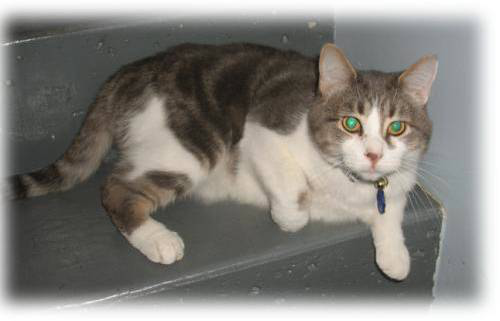

In [40]:
Image.open(path + 'test1/' + filenames[0])

In [41]:
isdog = np.clip(preds[:,1], 0.05, 0.95)
isdog[:5]

array([ 0.05,  0.05,  0.05,  0.05,  0.05], dtype=float32)

In [42]:
ids = [int(f[8:f.find('.')]) for f in filenames]
ids[:5]

[4892, 35, 3453, 1869, 4370]

In [43]:
result = np.stack([ids, isdog], axis=1)
result[:5]

array([[  4.8920e+03,   5.0000e-02],
       [  3.5000e+01,   5.0000e-02],
       [  3.4530e+03,   5.0000e-02],
       [  1.8690e+03,   5.0000e-02],
       [  4.3700e+03,   5.0000e-02]])

In [44]:
np.savetxt(path + 'sub1.csv', result, fmt='%d,%.5f', header='id,label', comments='')

In [45]:
from IPython.display import FileLink
FileLink(path + 'sub1.csv')

/home/quoniammm/version-control/mine-tensorflow-examples/fastAI/deeplearning1/nbs/data/redux/sub1.csv

# 可视化结果

1.一些随机的正确的标签
2.一些随机的不正确的标签
3.每个类别最正确的标签
4.每个类别最不正确的标签
5.最不确定的标签 (closest to .5)

In [ ]:
vgg.model.load_weights(path + 'results/ft1.h5')

In [ ]:
val_batches, probs = vgg.test(path + 'vaalid', batch_size = batch_size)

In [ ]:
labels = val_batches.classes
filenames = val_batches.filenames

In [ ]:
probs = probs[:, 0]
probs = np.round(1 - probs)
probs[:8]